# Importing data from Kaggle

In [5]:
!kaggle datasets download -d arthurchongg/imdb-top-1000-movies


  0%|          | 0.00/55.4k [00:00<?, ?B/s]
100%|##########| 55.4k/55.4k [00:00<00:00, 1.83MB/s]


In [18]:
from zipfile import ZipFile

In [22]:
with ZipFile('./imdb-top-1000-movies.zip', 'r') as zObject:
    zObject.extractall(path="./csv")

In [26]:
# !kaggle datasets list

# Viewing the data

In [51]:
import polars as pl

In [169]:
pl.scan_csv("csv/imdb_clean.csv").collect().head()

title,release_year,runtime,genre,rating,gross(M)
str,i64,str,str,f64,f64
"""The Shawshank …",1994,"""142 min""","""Drama""",9.3,28.34
"""The Godfather""",1972,"""175 min""","""Crime""",9.2,134.97
"""The Godfather""",1972,"""175 min""","""Drama""",9.2,134.97
"""The Dark Knigh…",2008,"""152 min""","""Action""",9.0,534.86
"""The Dark Knigh…",2008,"""152 min""","""Crime""",9.0,534.86


In [168]:
pl.scan_csv("csv/imdb_clean2.csv").collect().head()

,title,release_year,runtime,genre,rating,metascore,gross(M)
i64,str,i64,i64,str,f64,i64,f64
0,"""The Shawshank …",1994,142,"""Drama""",9.3,82,28.34
1,"""The Godfather""",1972,175,"""Crime""",9.2,100,134.97
1,"""The Godfather""",1972,175,"""Drama""",9.2,100,134.97
2,"""The Dark Knigh…",2008,152,"""Action""",9.0,84,534.86
2,"""The Dark Knigh…",2008,152,"""Crime""",9.0,84,534.86


In [161]:
df.describe()

describe,title,year,runtime,rating,gross(M)
str,str,f64,f64,f64,f64
"""count""","""994""",994.0,994.0,994.0,994.0
"""null_count""","""0""",0.0,0.0,0.0,0.0
"""mean""",null,1991.655936,124.086519,7.969115,58.175372
"""std""",null,24.018043,28.694743,0.276326,109.401613
"""min""","""12 Angry Men""",1920.0,45.0,7.6,0.0
"""max""","""Zulu""",2023.0,321.0,9.3,936.66
"""median""",null,1999.0,120.0,7.9,9.53
"""25%""",null,1975.0,103.0,7.8,0.26
"""75%""",null,2011.0,138.0,8.1,61.5


# Messing with imdb_clean

In [170]:
df = pl.scan_csv("csv/imdb_clean.csv").collect()

Exculding genre

In [ ]:
# df["title"]

In [171]:
df = df.drop("genre")
df = df.unique(subset=["title"], maintain_order=True)

In [172]:
df.head()

title,release_year,runtime,rating,gross(M)
str,i64,str,f64,f64
"""The Shawshank …",1994,"""142 min""",9.3,28.34
"""The Godfather""",1972,"""175 min""",9.2,134.97
"""The Dark Knigh…",2008,"""152 min""",9.0,534.86
"""Schindler's Li…",1993,"""195 min""",9.0,96.9
"""12 Angry Men""",1957,"""96 min""",9.0,4.36


In [173]:
df = df.with_columns(
    pl.col("runtime")
    .apply(lambda s: int(s.split()[0]))
)

In [174]:
df =  df.rename({"release_year":"year"})

In [175]:
df

title,year,runtime,rating,gross(M)
str,i64,i64,f64,f64
"""The Shawshank …",1994,142,9.3,28.34
"""The Godfather""",1972,175,9.2,134.97
"""The Dark Knigh…",2008,152,9.0,534.86
"""Schindler's Li…",1993,195,9.0,96.9
"""12 Angry Men""",1957,96,9.0,4.36
"""The Godfather …",1974,202,9.0,57.3
"""The Lord of th…",2003,201,9.0,377.85
"""Spider-Man: Ac…",2023,140,8.9,0.0
"""Pulp Fiction""",1994,154,8.9,107.93


# Some agg

In [176]:
mx_rate = df.groupby('year').agg([
    pl.all().sort_by('rating').last()
]).sort(by='year')

In [177]:
mx_rate

year,title,runtime,rating,gross(M)
i64,str,i64,f64,f64
1920,"""The Cabinet of…",67,8.0,0.0
1921,"""The Kid""",68,8.3,5.45
1922,"""Nosferatu""",94,7.9,0.0
1924,"""Sherlock Jr.""",45,8.2,0.98
1925,"""The Gold Rush""",95,8.1,5.45
1926,"""The General""",78,8.1,1.03
1927,"""Metropolis""",153,8.3,1.24
1928,"""The Passion of…",114,8.2,0.02
1930,"""All Quiet on t…",152,8.1,3.27


In [178]:
import matplotlib.pyplot as plt

Funny enough, the lowest rating is 7.6 so that filter does nothing :)

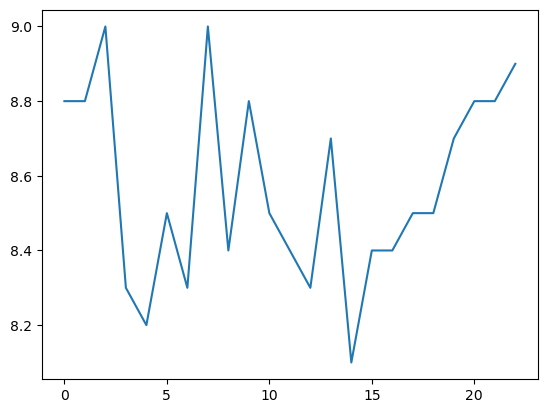

In [181]:
filtered_max = mx_rate.filter(
    (pl.col("rating") > 7.5) &
    (pl.col("year") > 2000)
)
plt.plot(filtered_max['rating'])

In [190]:
for row in filtered_max.iter_rows():
    print(f"{row[1]} ({row[0]})")

The Lord of the Rings: The Fellowship of the Ring (2001)
The Lord of the Rings: The Two Towers (2002)
The Lord of the Rings: The Return of the King (2003)
Eternal Sunshine of the Spotless Mind (2004)
My Father and My Son (2005)
The Prestige (2006)
Like Stars on Earth (2007)
The Dark Knight (2008)
3 Idiots (2009)
Inception (2010)
The Intouchables (2011)
The Dark Knight Rises (2012)
Drishyam (2013)
Interstellar (2014)
Bajrangi Bhaijaan (2015)
Your Name. (2016)
Coco (2017)
96 (2018)
Parasite (2019)
Soorarai Pottru (2020)
Jai Bhim (2021)
Rocketry: The Nambi Effect (2022)
Spider-Man: Across the Spider-Verse (2023)
